# 4.4.7 クラスタリング

In [1]:
from sklearn.datasets import load_iris
# Irisデータセットを読み込む
iris = load_iris()
data = iris.data
# 1, 3列目を抽出
X = data[:100, [0, 2]]

In [2]:
import matplotlib.pyplot as plt
# 散布図を描画
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1])
ax.set_xlabel('Sepal Width')
ax.set_ylabel('Petal Width')
plt.show()

<Figure size 640x480 with 1 Axes>

In [3]:
from sklearn.cluster import KMeans
# クラスタの数を3とするKMeansのインスタンスを生成
km = KMeans(n_clusters=3, init='random', n_init=10, random_state=123)
# KMeansを実行
y_km = km.fit_predict(X)

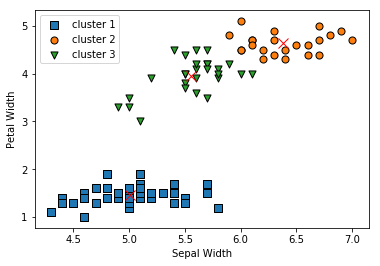

In [4]:
import numpy as np
fig, ax = plt.subplots()
# 散布図(クラスタ1)
ax.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50,
           edgecolor='black', marker='s', label='cluster 1')
# クラスタ中心(クラスタ1)
ax.plot(np.mean(X[y_km == 0, 0]), np.mean(X[y_km == 0, 1]),
        marker='x', markersize=10, color='red')
#  散布図(クラス２)
ax.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50,
           edgecolor='black', marker='o', label='cluster 2')
# クラスタ中心(クラスタ2)
ax.plot(np.mean(X[y_km == 1, 0]), np.mean(X[y_km == 1, 1]),
        marker='x', markersize=10, color='red')

#  散布図(クラス3)
ax.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50,
           edgecolor='black', marker='v', label='cluster 3')
# クラスタ中心(クラスタ3)
ax.plot(np.mean(X[y_km ==2, 0]), np.mean(X[y_km == 2, 1]),
        marker='x', markersize=10, color='red')
ax.set_xlabel('Sepal Width')
ax.set_ylabel('Petal Width')
ax.legend()
plt.show()

In [5]:
from sklearn.cluster import AgglomerativeClustering
# 擬集型の階層クラスタリングのインスタンスを作成
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
# クラスタリングを実行し、各クラスのクラスタ番号を取得
labels = ac.fit_predict(X)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0])

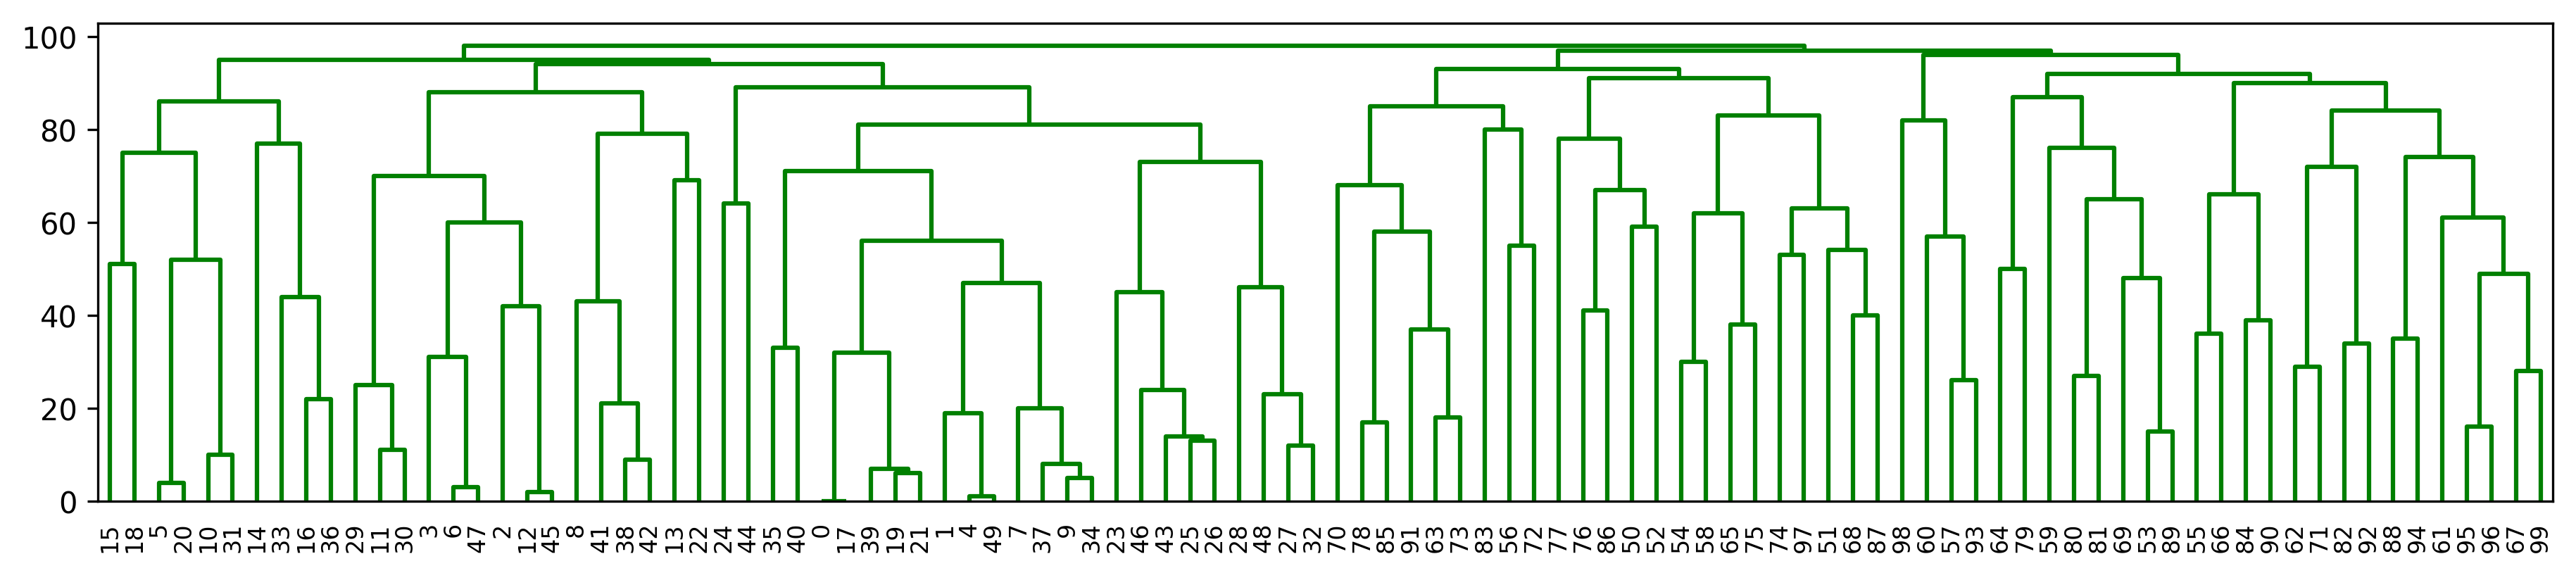

In [6]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram
# 告らすとの関係を抽出
children = ac.children_
# クラスタ間の距離を抽出
distance = np.arange(children.shape[0])
# 各データの観測番号
no_of_observations = np.arange(2, children.shape[0]+2)
# コクラスタ、クラスタ間の距離、観測番号を列方向に結合
linkage_matrix = np.hstack((children, 
                distance[:, np.newaxis],
                no_of_observations[:, np.newaxis])).astype(float)
# 樹形図をプロット
fig, ax = plt.subplots(figsize=(15, 3), dpi=300)
dendrogram(linkage_matrix, labels=np.arange(100), leaf_font_size=8, color_threshold=np.inf)
plt.show()